# CodSoft Data Science Internship

#### Dataset from -- https://www.kaggle.com/datasets/arshid/iris-flower-dataset

#  TASK 3 -  IRIS FLOWER CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
IrisData = pd.read_csv("IRIS.csv")
IrisData

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
IrisData.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### We'll understand the data pattern

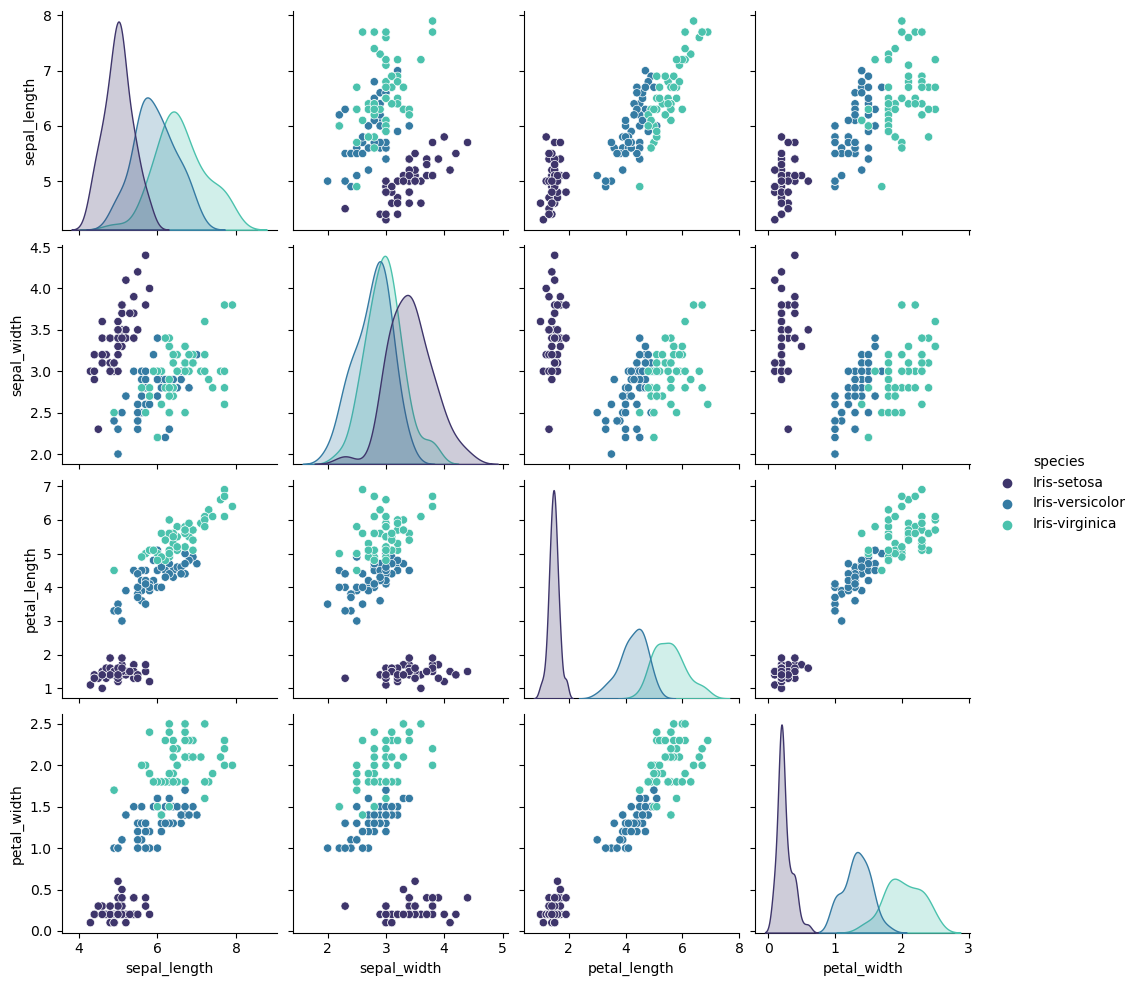

In [4]:
sns.pairplot(IrisData,hue='species',palette='mako')
plt.show()

### Understanding sepal length

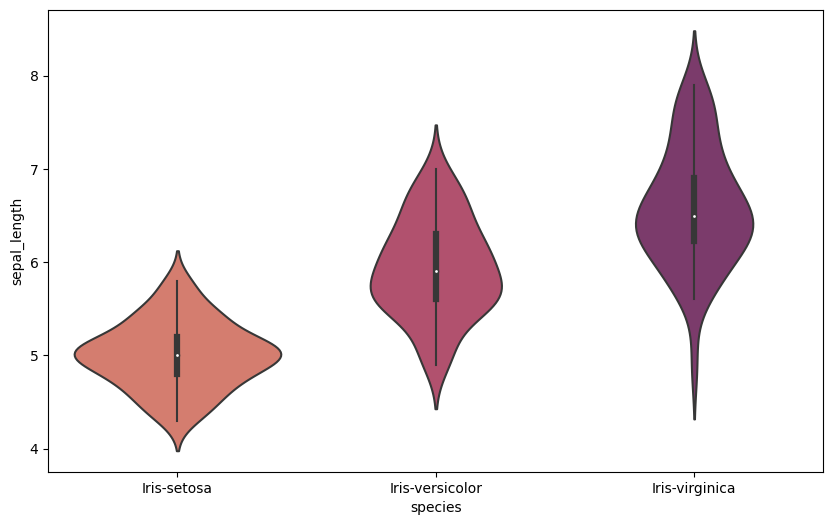

In [5]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='species',y='sepal_length',data=IrisData,palette='flare')
plt.show()

### Understanding petal length

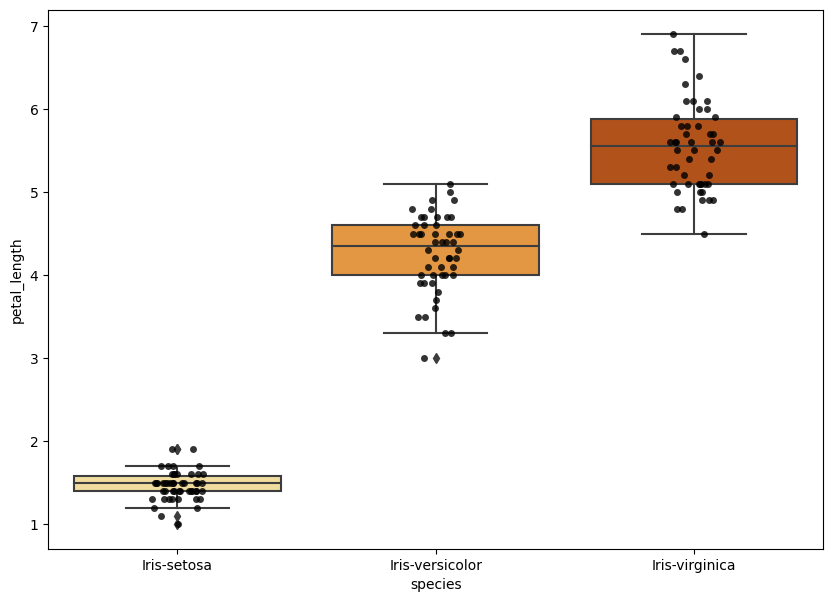

In [6]:
plt.figure(figsize=(10,7))
sns.boxplot(x='species',y='petal_length',data=IrisData,palette='YlOrBr')
sns.stripplot(x='species',y='petal_length',data=IrisData,color='black',alpha=0.8)
plt.show()

In [7]:
IrisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
IrisData.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
IrisData['species']=label_encoder.fit_transform(IrisData['species'])

In [10]:
IrisData

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


###### # We started by importing the Iris dataset and performing initial data exploration. The dataset comprises 150 entries with no missing values or null values. The distribution of features was analyzed using visualizations such as pair plots, violin plots, and box plots.

### Feature Engineering

##### sepal length and width ratio

In [11]:
IrisData['sepal_ratio']=IrisData['sepal_length']/IrisData['sepal_width']
IrisData

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,0,1.457143
1,4.9,3.0,1.4,0.2,0,1.633333
2,4.7,3.2,1.3,0.2,0,1.468750
3,4.6,3.1,1.5,0.2,0,1.483871
4,5.0,3.6,1.4,0.2,0,1.388889
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2.233333
146,6.3,2.5,5.0,1.9,2,2.520000
147,6.5,3.0,5.2,2.0,2,2.166667
148,6.2,3.4,5.4,2.3,2,1.823529


###### # A new feature, `sepal_ratio`, was addes by dividing `sepal_length` and `sepal_width`. This feature was added to explore its potential and its impact on model performance and analysis.

# Building the Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [13]:
X=IrisData[['sepal_length','sepal_width','petal_length','petal_width','sepal_ratio']]
Y=IrisData['species']

### Feature Scaling

In [14]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### One-hot encoding for the target

In [15]:
Y_encoded=to_categorical(Y)

### Split the data

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y_encoded,test_size=0.2,random_state=42)

## Sequential Model

In [17]:
model=Sequential()

model.add(Dense(64,input_dim=5,activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(3,activation='softmax'))  

K:\anaconda_py\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=50,batch_size=10,verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1421 - loss: 1.1162    
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7366 - loss: 0.9060 
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8439 - loss: 0.6995 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8212 - loss: 0.5712 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8229 - loss: 0.4849 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8419 - loss: 0.4035 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8813 - loss: 0.3748 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8220 - loss: 0.3858 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8583 - loss: 0.3231 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8697 - loss: 0.2925 
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.2910 
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [19]:
model.fit(X_train,Y_train,epochs=70,batch_size=12,verbose=1)

Epoch 1/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.0655  
Epoch 2/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9756 - loss: 0.0545 
Epoch 3/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9867 - loss: 0.0472 
Epoch 4/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9674 - loss: 0.0694 
Epoch 5/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.0498 
Epoch 6/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9573 - loss: 0.0763 
Epoch 7/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9730 - loss: 0.0654 
Epoch 8/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9675 - loss: 0.0528 
Epoch 9/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9747 - loss: 0.0757 
Epoch 10/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9631 - loss: 0.0682 
Epoch 11/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9809 - loss: 0.0482 
Epoch 12/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

##### # We prepared the data by scaling features and encoding the target variable. A Sequential neural network model was built with 2 hidden layers. The model was trained for 50 epochs with a batch size of 10.

In [20]:
Y_pred_prob=model.predict(X_test)
Y_pred=np.argmax(Y_pred_prob,axis=1)
Y_test_actual=np.argmax(Y_test,axis=1)
print('--- Neural Network Model ---')
print(f'Accuracy:{accuracy_score(Y_test_actual,Y_pred):.2f}')
print(classification_report(Y_test_actual,Y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
--- Neural Network Model ---
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Confusion Matrix

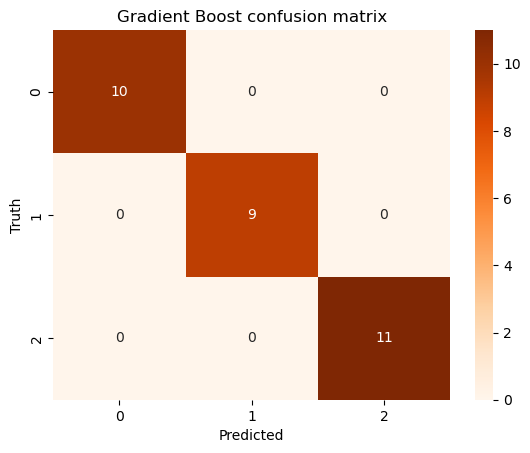

In [21]:
import scikitplot as skplt
cm=skplt.metrics.confusion_matrix(Y_test_actual,Y_pred)
sns.heatmap(cm,annot=True,cmap='Oranges',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"Gradient Boost confusion matrix")
plt.show()

##### # The model achieved an accuracy of 100% on the test set. A confusion matrix with an `'Oranges'` color map was used to visualize the performance.

### Integrate Principal Component Analysis

In [22]:
from sklearn.decomposition import PCA

In [26]:
PCA=PCA(n_components=2)
X_PCA=PCA.fit_transform(X_scaled)

In [28]:
IrisData_PCA=pd.DataFrame(data=X_PCA,columns=['PCA1','PCA2'])
IrisData_PCA['species']=IrisData['species']

### Split the PCA-reduced data

In [29]:
X_train_PCA,X_test_PCA,Y_train,Y_test= train_test_split(X_PCA,Y_encoded,test_size=0.2,random_state=42)

In [30]:
model_PCA=Sequential()
model_PCA.add(Dense(64,input_dim=2,activation='relu'))
model_PCA.add(Dense(32,activation='relu'))
model_PCA.add(Dense(3,activation='softmax'))

K:\anaconda_py\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model_PCA.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
History_PCA=model_PCA.fit(X_train_PCA,Y_train,epochs=50,batch_size=10,verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4450 - loss: 1.0846
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7641 - loss: 0.8628 
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7542 - loss: 0.7260 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8173 - loss: 0.6428 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8307 - loss: 0.5302 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7854 - loss: 0.5416 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.8099 - loss: 0.4873
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8193 - loss: 0.4392 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4349 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7928 - loss: 0.4047 
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8406 - loss: 0.3781 
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

In [33]:
Y_pred_prob_PCA= model_PCA.predict(X_test_PCA)
Y_pred_PCA= np.argmax(Y_pred_prob_PCA,axis=1)
Y_test_actual=np.argmax(Y_test,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


--- Neural Network Model with PCA ---
Accuracy:0.90
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



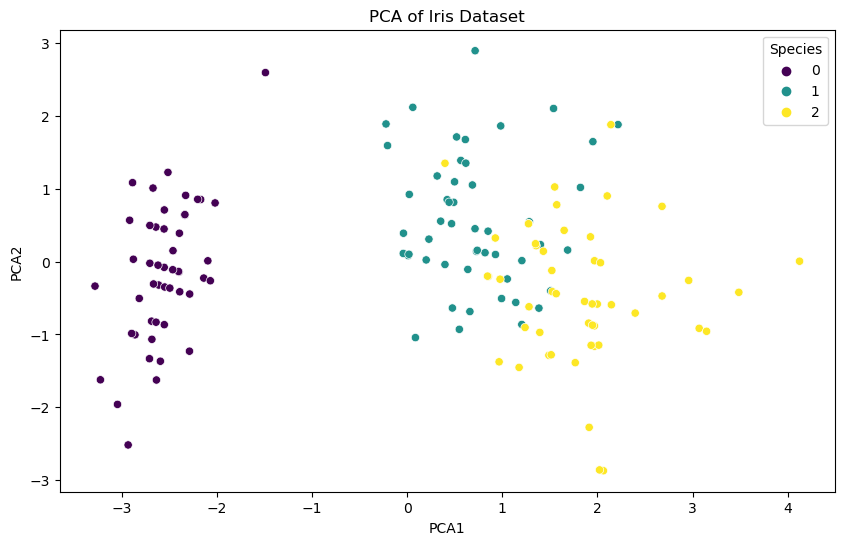

In [35]:
print('--- Neural Network Model with PCA ---')
print(f'Accuracy:{accuracy_score(Y_test_actual,Y_pred_PCA):.2f}')
print(classification_report(Y_test_actual,Y_pred_PCA))
plt.figure(figsize=(10,6))
sns.scatterplot(x=IrisData_PCA['PCA1'],y=IrisData_PCA['PCA2'],hue=IrisData_PCA['species'],palette='viridis')
plt.title('PCA of Iris Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Species')
plt.show()

###### We can conclude that 'Neural Network Model' is accurate and efficent than the 'Neural Network Model with PCA'